In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
Dense=keras.layers.Dense
import numpy as np
import matplotlib.pyplot as plt
epochs=300

iris_data=pd.read_csv("iris.csv",encoding="utf-8")

#アヤメデータをラベルと入力データに分離する
y_labels=iris_data.loc[:,"Name"]
x_data=iris_data.loc[:,
                    ["SepalLength","SepalWidth","PetalLength","PetalWidth"]]

#ラベルデータをOne-Hotラベルに直す
labels={
    'Iris-setosa':[1,0,0],
    'Iris-versicolor':[0,1,0],
    'Iris-virginica':[0,0,1]
}
y_nums=np.array(list(map(lambda v:labels[v],y_labels)))
x_data=np.array(x_data)

#学習用とテスト用に分離
x_train,x_test,y_train,y_test=train_test_split(x_data,y_nums,train_size=0.8)

#入力の次元及び活性化関数の作成
#出力の次元及び活性化関数の作成
model=keras.models.Sequential()
model.add(Dense(10,activation='relu',input_shape=(4,)))#活性化関数にはランプ関数を用いる
model.add(Dense(3,activation='softmax'))#活性化関数にはsoftmaxを用いる

model.compile(
        loss='categorical_crossentropy',#クロスエントロピーは誤差関数の1つ
        optimizer='adam',#最適化の手法を指定、確率的勾配降下法の１つであるアダムを用いる
        metrics=['accuracy'])#metricsはモデルをどのように評価するかを示す

#学習を実行
result=model.fit(x_train,y_train,
         batch_size=20,#batchsizeは１回に計算するデータの数
         epochs=epochs)#epochsは繰り返し回数を示す
#モデルを評価
score=model.evaluate(x_test,y_test,verbose=1)
print('正解率=',score[1],'loss=',score[0])

plt.plot(range(1,epochs+1),
        result.history['accuracy'],label="training")
plt.plot(range(1,epochs+1),
        result.history['loss'],label="loss")
plt.xlabel('epochs'+str(epochs))
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import keras 
from keras.datasets import mnist
from matplotlib import pyplot

#MNISTのデータを読み込む
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#データを４×８に出力
for i in range(0,32):
    pyplot.subplot(4,8,i+1)
    pyplot.imshow(X_train[i],cmap='gray')
#データを28*28=784の一次元配列に変換
X_train=X_train.reshape(-1,784).astype('float32')/255
X_test=X_test.reshape(-1,784).astype('float32')/255
#ラベルデータをOne-Hotベクトルに直す
y_train=keras.utils.to_categorical(y_train.astype('int32'),10)
y_test=keras.utils.to_categorical(y_test.astype('int32'),10)
#入力と出力を指定
in_size=28*28
out_size=10

#モデル構造を定義
Dense=keras.layers.Dense
model=keras.models.Sequential()
model.add(Dense(512,activation='relu',input_shape=(in_size,)))
model.add(Dense(out_size,activation='softmax'))

#モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
#学習を実行
model.fit(X_train,y_train,
         batch_size=20,epochs=20)

#モデルを評価
score=model.evaluate(X_test,y_test,verbose=1)
print('正解率=',score[1],'loss=',score[0])


In [ ]:
# 入力と出力を指定
in_size = 28 * 28
out_size = 10

# モデル構造を定義
Dense = keras.layers.Dense
model = keras.models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dense(out_size, activation='softmax'))

# モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行
model.fit(X_train, y_train,
    batch_size=20, epochs=20)

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

Epoch 1/50
469/469 [==============================] - 5s 12ms/step - loss: 0.2462 - accuracy: 0.9245 - val_loss: 0.1123 - val_accuracy: 0.9627
Epoch 2/50
469/469 [==============================] - 5s 12ms/step - loss: 0.1028 - accuracy: 0.9686 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 3/50
469/469 [==============================] - 5s 12ms/step - loss: 0.0735 - accuracy: 0.9777 - val_loss: 0.0733 - val_accuracy: 0.9789
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0601 - accuracy: 0.9818 - val_loss: 0.0690 - val_accuracy: 0.9817
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0801 - val_accuracy: 0.9793
Epoch 6/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0430 - accuracy: 0.9868 - val_loss: 0.0826 - val_accuracy: 0.9800
Epoch 7/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0384 - accuracy: 0.9891 - val_loss: 0.0735 - val_accuracy: 0.9822

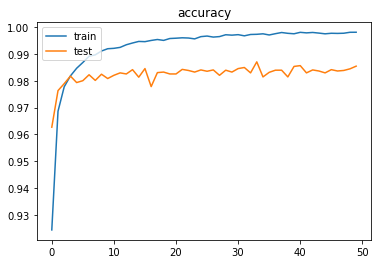

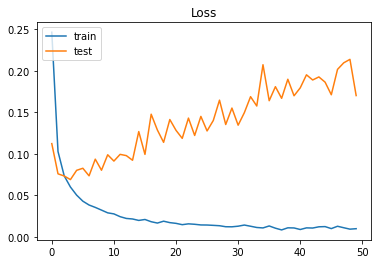

In [5]:
#MLP
import keras 
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

# 入力と出力を指定
in_size = 28 * 28
out_size = 10
#MNISTのデータを読み込む
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#データを28*28=784の一次元配列に変換
X_train=X_train.reshape(-1,784).astype('float32')/255
X_test=X_test.reshape(-1,784).astype('float32')/255
#ラベルデータをOne-Hotベクトルに直す
y_train=keras.utils.to_categorical(y_train.astype('int32'),10)
y_test=keras.utils.to_categorical(y_test.astype('int32'),10)

#MLPモデル構造を定義
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(in_size,)))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size,activation='softmax'))
#モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
#学習を実行
hist=model.fit(X_train,y_train,
              batch_size=128,
              epochs=50,
              verbose=1,
              validation_data=(X_test,y_test))
#モデルを評価
score=model.evaluate(X_test,y_test,verbose=1)
print('正解率＝',score[1],'loss=',score[0])

#学習の様子をグラフへ描画
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

Epoch 1/12
469/469 [==============================] - 63s 134ms/step - loss: 0.2201 - accuracy: 0.9322 - val_loss: 0.0484 - val_accuracy: 0.9843
Epoch 2/12
469/469 [==============================] - 65s 138ms/step - loss: 0.0803 - accuracy: 0.9765 - val_loss: 0.0386 - val_accuracy: 0.9865
Epoch 3/12
469/469 [==============================] - 62s 132ms/step - loss: 0.0630 - accuracy: 0.9815 - val_loss: 0.0389 - val_accuracy: 0.9868
Epoch 4/12
469/469 [==============================] - 64s 136ms/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0370 - val_accuracy: 0.9883
Epoch 5/12
469/469 [==============================] - 63s 133ms/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.0342 - val_accuracy: 0.9891
Epoch 6/12
469/469 [==============================] - 63s 134ms/step - loss: 0.0436 - accuracy: 0.9873 - val_loss: 0.0346 - val_accuracy: 0.9889
Epoch 7/12
469/469 [==============================] - 75s 159ms/step - loss: 0.0406 - accuracy: 0.9884 - val_loss: 0.0360 - val_ac

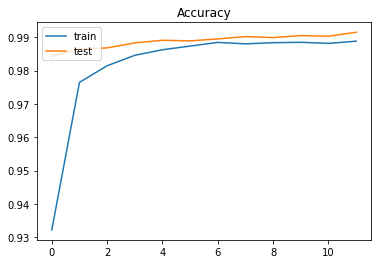

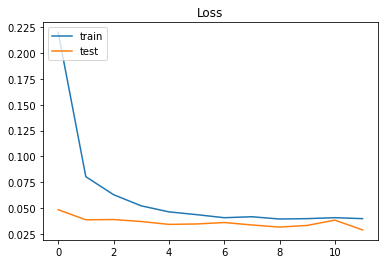

In [9]:
#畳み込みニューラルネットワーク(CNN)
import keras 
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop

#入力と出力を指定－－１
im_rows=28
im_cols=28
im_color=1
in_shape=(im_rows,im_cols,im_color)
out_size=10
#MNISTのデータを読み込む
(X_train,y_train),(X_test,y_test)=mnist.load_data()
#データを28*28=784の一次元配列に変換
X_train=X_train.reshape(-1,im_rows,im_cols,im_color)
X_train=X_train.astype('float32')/255
X_test=X_test.reshape(-1,im_rows,im_cols,im_color)
X_test=X_test.astype('float32')/255
#ラベルデータをOne-Hotベクトルに直す
y_train=keras.utils.to_categorical(y_train.astype('int32'),10)
y_test=keras.utils.to_categorical(y_test.astype('int32'),10)
#CNNモデル構造を定義
model=Sequential()
model.add(Conv2D(32,
                kernel_size=(3,3),
                activation='relu',
                input_shape=in_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size,activation='softmax'))
#モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
#学習を実行
hist=model.fit(X_train,y_train,
              batch_size=128,
              epochs=12,
              verbose=1,
              validation_data=(X_test,y_test))
#モデルを評価
score=model.evaluate(X_test,y_test,verbose=1)
print('正解率＝',score[1],'loss=',score[0])
#学習の様子をグラフへ描画
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [10]:
from keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 109s 1us/step


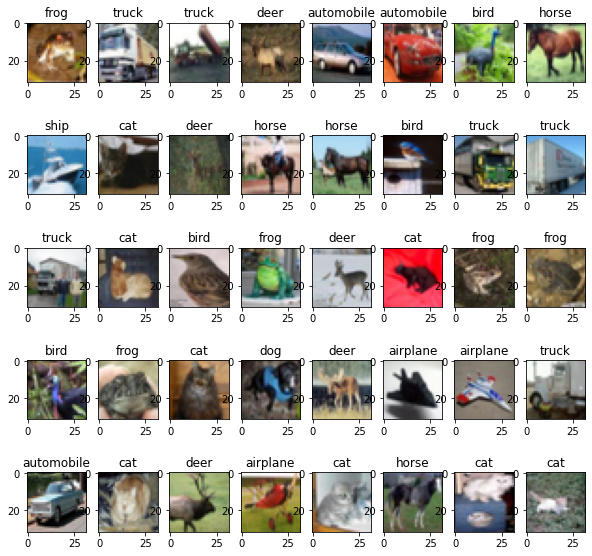

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
labels=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
for i in range(0,40):
    im=Image.fromarray(X_train[i])
    plt.subplot(5,8,i+1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off")#x軸をオフ
    plt.tick_params(labelleft="off",left="off")#y軸をおｈ
    plt.imshow(im)

plt.show()

Epoch 1/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.8881 - accuracy: 0.3287 - val_loss: 1.7315 - val_accuracy: 0.3739
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.7080 - accuracy: 0.3895 - val_loss: 1.6428 - val_accuracy: 0.4184
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6419 - accuracy: 0.4134 - val_loss: 1.5934 - val_accuracy: 0.4271
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5967 - accuracy: 0.4302 - val_loss: 1.5595 - val_accuracy: 0.4388
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5623 - accuracy: 0.4430 - val_loss: 1.6171 - val_accuracy: 0.4315
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.5394 - accuracy: 0.4527 - val_loss: 1.5899 - val_accuracy: 0.4383
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.5193 - accuracy: 0.4576 - val_loss: 1.5169 -

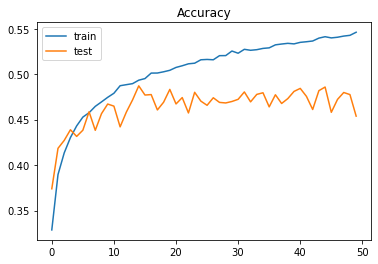

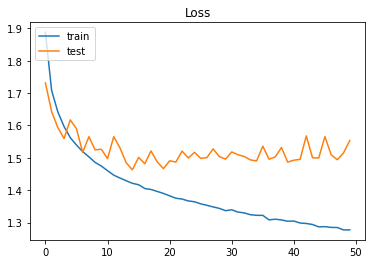

In [15]:
#多層パーセプトロンによるニューラルネットワーク(MLP)
import keras 
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout

num_classes=10
im_rows=32
im_cols=32
im_size=im_rows*im_cols*3

#データを読み込む
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#データを一次元配列に変換
X_train=X_train.reshape(-1,im_size).astype('float32')/255
X_test=X_test.reshape(-1,im_size).astype('float32')/255
#ラベルデータをOne-Hotベクトルに直す
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)
#モデル構造を定義
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(im_size,)))
model.add(Dense(num_classes,activation='softmax'))
#モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
#学習を実行
hist=model.fit(X_train,y_train,
              batch_size=32,
              epochs=50,
              verbose=1,
              validation_data=(X_test,y_test))
#モデルを評価
score=model.evaluate(X_test,y_test,verbose=1)
print('正解率＝',score[1],'loss=',score[0])
#学習の様子をグラフへ描画
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [27]:
#畳み込みニューラルネットワーク(CNN)
import keras 
from keras.datasets import cifar10
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop

num_classes=10
im_rows=32
im_cols=32
im_color=1
in_shape=(im_rows,im_cols,3)
#MNISTのデータを読み込む
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
#データを正規化
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255
#ラベルデータをOne-Hotベクトルに直す
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)
#CNNモデル構造を定義
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',
                input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
#モデルを構築
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
#学習を実行
hist=model.fit(X_train,y_train,
              batch_size=32,
              epochs=50,
              verbose=1,
              validation_data=(X_test,y_test))
#モデルを評価
score=model.evaluate(X_test,y_test,verbose=1)
print('正解率＝',score[1],'loss=',score[0])
#学習の様子をグラフへ描画
#正解率の推移をプロット
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

#ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

Epoch 1/50
1563/1563 [==============================] - 108s 69ms/step - loss: 1.5242 - accuracy: 0.4431 - val_loss: 1.2052 - val_accuracy: 0.5673
Epoch 2/50
1563/1563 [==============================] - 108s 69ms/step - loss: 1.1406 - accuracy: 0.5945 - val_loss: 0.9776 - val_accuracy: 0.6501
Epoch 3/50
1563/1563 [==============================] - 117s 75ms/step - loss: 0.9868 - accuracy: 0.6521 - val_loss: 0.9447 - val_accuracy: 0.6688
Epoch 4/50
1563/1563 [==============================] - 103s 66ms/step - loss: 0.8932 - accuracy: 0.6852 - val_loss: 0.8359 - val_accuracy: 0.7062
Epoch 5/50
1563/1563 [==============================] - 109s 70ms/step - loss: 0.8333 - accuracy: 0.7080 - val_loss: 0.7566 - val_accuracy: 0.7366
Epoch 6/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.7777 - accuracy: 0.7278 - val_loss: 0.7270 - val_accuracy: 0.7466
Epoch 7/50
1563/1563 [==============================] - 112s 72ms/step - loss: 0.7363 - accuracy: 0.7425 - val_loss: 0

KeyboardInterrupt: 

In [ ]:
model.save_weights('cifar10-weight.h5')